<a href="https://colab.research.google.com/github/aditya301cs/Daily-Data-Science-ML/blob/main/Random_Forest_Classification_With_Hyperparameter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌲 Random Forest Algorithm – Classification

## 📌 Overview
Random Forest is an **ensemble learning algorithm** that builds multiple decision trees
and combines their predictions to produce a more accurate and stable result.

It is based on the concept of **bagging (bootstrap aggregating)** and is widely used
for both classification and regression tasks due to its robustness and high performance.


## 📖 What is Random Forest?

Random Forest is an ensemble method that:
- Creates multiple decision trees using random subsets of data
- Uses random subsets of features at each split
- Aggregates predictions using majority voting (classification)
  or averaging (regression)

By combining multiple weak learners (decision trees),
Random Forest reduces overfitting and improves generalization.


## 🎯 Why Use Random Forest?

- Reduces overfitting compared to a single decision tree
- Handles high-dimensional data well
- Works with both numerical and categorical features
- Resistant to noise and outliers
- Provides feature importance


## ⚙️ How Random Forest Works

1. Random samples are drawn from the dataset (with replacement)
2. A decision tree is trained on each sample
3. At every split, a random subset of features is selected
4. Final prediction is made by:
   - Majority voting (classification)
   - Averaging (regression)


## 📁 Dataset Description

This notebook uses a dataset suitable for demonstrating
the Random Forest algorithm.

### Dataset Characteristics:
- Structured tabular data
- Contains multiple input features
- Target variable represents the class label

The dataset is split into training and testing sets
to evaluate model performance on unseen data.


#Import Required Libraries


In [3]:
# Core libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model selection and evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Machine Learning model
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [5]:
# Load the dataset
df = pd.read_csv('heart.csv')

In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## 🔍 Exploratory Data Analysis (EDA)

Before training the model, we examine:
- Dataset shape
- Feature types
- Presence of missing values
- Target class distribution


In [6]:
print('Missing values per column:')
display(df.isnull().sum())

print('\nTarget variable distribution:')
display(df['target'].value_counts())

Missing values per column:


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0



Target variable distribution:


,count
target,
1,165
0,138


In [7]:
# Dataset information
df.info()

# Statistical summary
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## 🧮 Feature Selection & Target Variable


In [8]:
X = df.drop("target", axis=1)  # Replace 'target' with actual column name
y = df["target"]


In [10]:
# X = df.iloc[:,0:-1]
# y = df.iloc[:,-1]

## 🔀 Train–Test Split

The dataset is split into training and testing sets
to evaluate model performance on unseen data.


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


## 🌲 Random Forest Model Training


In [49]:
rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)


RandomForestClassifier()

## 📊 Baseline Random Forest Model Evaluation


In [50]:
y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8688524590163934
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



## 📊 Classification Report – Baseline Random Forest Model (Before Hyperparameter Tuning)

The following classification report represents the performance of the **initial Random Forest model**
trained using **default hyperparameters**, evaluated on the **test dataset**.

### 🔢 Overall Performance
- **Accuracy:** ~86.9%
- The model correctly classifies approximately **87% of the test samples**
- This serves as a **baseline performance** before applying hyperparameter tuning

---

### 🧾 Class-wise Interpretation

#### Class 0
- **Support:** 29 samples
- **Precision:** 0.89  
  - When the model predicts class `0`, it is correct **89% of the time**
- **Recall:** 0.83  
  - The model correctly identifies **83% of actual class 0 instances**
- **F1-Score:** 0.86  
  - Indicates reasonably balanced performance, with some false negatives

---

#### Class 1
- **Support:** 32 samples
- **Precision:** 0.85  
  - When the model predicts class `1`, it is correct **85% of the time**
- **Recall:** 0.91  
  - The model correctly identifies **91% of actual class 1 instances**
- **F1-Score:** 0.88  
  - Shows strong recall but slightly lower precision

---

### ⚖️ Macro Average vs Weighted Average

- **Macro Average**
  - Treats both classes equally
  - Indicates balanced performance across classes

- **Weighted Average**
  - Accounts for class distribution
  - Very close to macro average, confirming **no strong class imbalance**

---

### 🧠 Key Observations (Baseline Model)

- The baseline model performs **reasonably well** without tuning
- Recall for class `1` is higher than class `0`, indicating fewer false negatives for class `1`
- There is room for improvement in:
  - Overall accuracy
  - Recall for class `0`
- This baseline evaluation provides a reference point
  for measuring improvements after **hyperparameter tuning**

## 🔁 Cross-Validation

Cross-validation provides a more reliable estimate
of model performance.


In [51]:
cv_scores = cross_val_score(rf_model, X, y, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-validation scores: [0.85245902 0.86885246 0.80327869 0.78333333 0.78333333]
Mean CV Accuracy: 0.8182513661202184


## 🌟 Feature Importance

Random Forest provides feature importance scores,
which help understand which features influence predictions the most.


In [52]:
feature_importance = pd.Series(
    rf_model.feature_importances_, index=X.columns
).sort_values(ascending=False)

feature_importance


,0
ca,0.142437
oldpeak,0.129855
cp,0.107354
thalach,0.099726
thal,0.090609
age,0.085808
chol,0.082082
trestbps,0.078756
exang,0.070227
slope,0.051119


##Prediction on New Data

In [53]:
# Step 1: New data - Ensure column names match X
new_data = {
    'age': 55,
    'sex': 1,
    'cp': 2,
    'trestbps': 130,
    'chol': 240,
    'fbs': 0,
    'restecg': 1,
    'thalach': 160,
    'exang': 0,
    'oldpeak': 1.0,
    'slope': 2,
    'ca': 0,
    'thal': 2
}

# Step 2: Convert to DataFrame
new_df = pd.DataFrame([new_data])

# Step 3: Align columns (This step is technically not needed if new_data is correctly structured, but it's harmless)
# new_df = new_df[X.columns] # This line is no longer strictly necessary if new_data is correct, but leaving it as is will work.

# Step 4: Predict
prediction = rf_model.predict(new_df)
probability = rf_model.predict_proba(new_df)

print("Prediction:", prediction)
print("Probability:", probability)

Prediction: [1]
Probability: [[0.06 0.94]]


## 🧠 Key Takeaways

- Random Forest is a powerful ensemble method
- It reduces overfitting and variance
- Works well with complex datasets
- Provides feature importance for interpretability
- Widely used in real-world ML applications


## 🏁 Conclusion of Prediction on New Data

In this notebook, we:
- Understood the Random Forest algorithm
- Explored the dataset
- Built and evaluated a Random Forest classifier
- Analyzed feature importance

Random Forest serves as a strong baseline model
for many classification problems.


## 📊 Model Evaluation Using Confusion Matrix

A confusion matrix provides a detailed breakdown of the model’s predictions
by showing the number of correct and incorrect classifications.

It helps us understand:
- True Positives (TP)
- True Negatives (TN)
- False Positives (FP)
- False Negatives (FN)

This is especially useful for analyzing classification errors
beyond overall accuracy.


In [83]:
from sklearn.metrics import confusion_matrix

# Generate predictions
y_pred = rf_model.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

cm


array([[24,  5],
       [ 3, 29]])

# Visualize Confusion Matrix

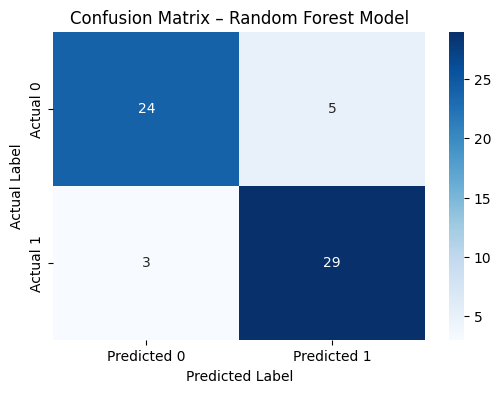

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix – Random Forest Model")
plt.show()


## 🔍 Confusion Matrix Interpretation

The confusion matrix can be interpreted as follows:

- **True Negatives (TN):**
  - Actual class `0` correctly predicted as `0`
- **False Positives (FP):**
  - Actual class `0` incorrectly predicted as `1`
- **False Negatives (FN):**
  - Actual class `1` incorrectly predicted as `0`
- **True Positives (TP):**
  - Actual class `1` correctly predicted as `1`

This breakdown helps identify which type of errors
the model is making more frequently.


#Extract TP, TN, FP, FN

In [85]:
tn, fp, fn, tp = cm.ravel()

print("True Negatives (TN):", tn)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)
print("True Positives (TP):", tp)


True Negatives (TN): 24
False Positives (FP): 5
False Negatives (FN): 3
True Positives (TP): 29


## 🎯 Evaluation Metrics Derived from Confusion Matrix

Using the confusion matrix values, we can compute key performance metrics:
- Accuracy
- Precision
- Recall
- F1-score
- Specificity

These metrics give deeper insights into model behavior.


#Calculate Metrics Manually

In [86]:
# Accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)

# Precision
precision = tp / (tp + fp)

# Recall (Sensitivity)
recall = tp / (tp + fn)

# Specificity
specificity = tn / (tn + fp)

# F1-score
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Accuracy     : {accuracy:.4f}")
print(f"Precision    : {precision:.4f}")
print(f"Recall       : {recall:.4f}")
print(f"Specificity  : {specificity:.4f}")
print(f"F1 Score     : {f1_score:.4f}")


Accuracy     : 0.8689
Precision    : 0.8529
Recall       : 0.9062
Specificity  : 0.8276
F1 Score     : 0.8788


#Classification Report

In [87]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



## Final Evaluation Summary

- The confusion matrix reveals how well the Random Forest model
  distinguishes between the two classes.
- Balanced True Positives and True Negatives indicate good model performance.
- Precision and recall values highlight the trade-off between
  false positives and false negatives.
- These metrics together confirm that the Random Forest model
  generalizes well on unseen test data.

Using the confusion matrix alongside accuracy and F1-score
provides a **complete and reliable evaluation** of the classification model.


## 🧠 Model Comparison & Evaluation Strategy (Conceptual Understanding)

In this notebook, multiple machine learning models were trained and evaluated to
identify the most suitable model for the classification task.

The models used include:
- Logistic Regression
- Support Vector Classifier (SVC)
- Random Forest Classifier
- Gradient Boosting Classifier

Each model was evaluated using **two different strategies** to understand both
performance and generalization ability.

---

### 🔹 1. Train–Test Split Evaluation

In the train–test approach:
- The dataset is split once into training and testing sets
- The model is trained on the training set
- Accuracy is computed on the test set

This approach provides a **quick and simple performance estimate**, but it has limitations:
- Results depend on a single random split
- Performance may be optimistic or pessimistic
- Not reliable for final model selection

**Learning:**  
Train–test accuracy answers the question:  
> *“How well did the model perform on this specific data split?”*

---

### 🔹 2. Cross-Validation Evaluation

To obtain a more reliable performance estimate, **k-fold cross-validation** was used.

In k-fold cross-validation (k = 10):
- The dataset is divided into 10 equal folds
- The model is trained and evaluated 10 times
- Each fold is used once as the validation set
- The final score is the average of all 10 evaluations

This approach:
- Reduces dependency on a single data split
- Measures model stability
- Provides a more realistic estimate of generalization performance

**Learning:**  
Cross-validation answers the question:  
> *“How consistently does the model perform across different data splits?”*

---

### 🔹 3. Why Compare Multiple Models?

Different algorithms learn different types of patterns:
- Logistic Regression learns linear relationships
- SVC focuses on maximizing class separation
- Random Forest captures non-linear patterns and interactions
- Gradient Boosting learns sequentially from previous model errors

Since no single algorithm is universally best, comparing multiple models helps
identify the most suitable one for the dataset.

---

### 🔹 4. Why Train–Test Accuracy and Cross-Validation Scores Differ

It is common to observe that:
- Train–test accuracy is slightly higher
- Cross-validation accuracy is lower but more stable

This happens because:
- Train–test evaluation uses a single split
- Cross-validation averages performance across multiple splits

**Key Insight:**  
Train–test accuracy may be optimistic, while cross-validation provides a
more honest and generalizable performance estimate.

---

### 🔹 5. Model Selection Strategy

The final model is not selected based solely on train–test accuracy.
Instead, the following factors are considered:
- Cross-validation accuracy
- Performance stability
- Model complexity
- Risk of overfitting

Cross-validation scores are therefore prioritized when comparing models.

---

### 🔹 6. Key Takeaways

- Train–test split provides a quick performance check
- Cross-validation provides a reliable generalization estimate
- Comparing multiple models is essential
- Model selection should be based on cross-validation performance
- Hyperparameter tuning is applied only after identifying a strong baseline model

This systematic evaluation strategy ensures that the selected model
is robust, stable, and suitable for real-world deployment.


## Model Initialization


In [54]:
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
svc = SVC()
lr = LogisticRegression()

### 🔹 1. Train–Test Split Evaluation

In [55]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8360655737704918

In [56]:
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7704918032786885

In [57]:
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test,y_pred)

0.7049180327868853

In [58]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.8852459016393442

### 🔹 2. Cross-Validation Evaluation

In [59]:
from sklearn.model_selection import cross_val_score

In [60]:
np.mean(cross_val_score(RandomForestClassifier(),X,y,cv=10,scoring='accuracy'))

np.float64(0.8279569892473118)

In [61]:
np.mean(cross_val_score(GradientBoostingClassifier(),X,y,cv=10,scoring='accuracy'))

np.float64(0.8013978494623656)

In [62]:
np.mean(cross_val_score(SVC(),X,y,cv=10,scoring='accuracy'))

np.float64(0.6604301075268817)

In [63]:
np.mean(cross_val_score(LogisticRegression(),X,y,cv=10,scoring='accuracy'))

np.float64(0.8316129032258065)

##Hyperparameter Tuning
- Hyperparameter tuning is the process of finding the optimal set of parameters for a machine learning model that are not learned from the data itself. These parameters, called hyperparameters, control the learning process and model structure. The goal is to maximize the model's performance on unseen data by systematically searching through different hyperparameter combinations, typically using techniques like GridSearchCV or RandomizedSearchCV.

In [64]:
rf = RandomForestClassifier(max_samples=0.75,random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9016393442622951

In [65]:


np.mean(cross_val_score(RandomForestClassifier(max_samples=0.75),X,y,cv=10,scoring='accuracy'))

np.float64(0.8181720430107526)

Ways of Hyperparameter Tuning
1. GridSearchCV
2. RandomizedSearchCV

#GridSearchCV

## 🔧 Hyperparameter Tuning using GridSearchCV

Hyperparameter tuning helps find the **optimal combination of parameters**
that improves model performance and generalization.

Instead of using default values, we systematically search
for the best parameters using **GridSearchCV**.

The following hyperparameters are tuned:
- `n_estimators` → Number of trees in the forest
- `max_features` → Fraction of features considered at each split
- `max_depth` → Maximum depth of each decision tree
- `max_samples` → Fraction of samples used to train each tree

In [66]:
# Number of trees in Random forest
n_estimators = [20,60,100,120]

#Numbers of features to consider at every split
max_features = [0.2,0.6,1.0]

#Maximum number of Levels in tree
max_depth = [2,8,None]

#Number of samples
max_samples = [0.5,0.75,1.0]

# total no of combination of random forest train = 4*4*3*3 = 108
#108 diff random forest train

## 🧮 Total Number of Model Combinations

The total number of Random Forest models trained during tuning is:

\[
4 \times 3 \times 3 \times 3 = 108
\]

This means **108 different Random Forest configurations** will be evaluated
during hyperparameter tuning.


In [67]:
param_grid = {'n_estimators' : n_estimators,
              'max_features' : max_features,
              'max_depth' : max_depth,
              'max_samples' : max_samples
              }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [68]:
rf = RandomForestClassifier()

In [69]:
grid_search = GridSearchCV(estimator=rf,
                       param_grid = param_grid,
                       cv=5,
                       verbose=2,
                       n_jobs = -1)

In [70]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [71]:
grid_search.best_params_

{'max_depth': None,
 'max_features': 0.2,
 'max_samples': 0.5,
 'n_estimators': 120}

In [72]:
grid_search.best_score_

np.float64(0.8388605442176871)

## 🌲 Train Optimized Random Forest Model using GridSearchCV

After performing hyperparameter tuning with GridSearchCV,
we extract the best estimator and retrain it on the training data.
The optimized model is then evaluated on the test dataset.


In [73]:
# Extract the best model from GridSearchCV
best_rf_model_grid = grid_search.best_estimator_

# Train the optimized Random Forest model
best_rf_model_grid.fit(X_train, y_train)


RandomForestClassifier(max_features=0.2, max_samples=0.5, n_estimators=120)

## 📊 Evaluation of Tuned Random Forest Model (GridSearchCV)

The following results represent the performance of the
Random Forest model optimized using GridSearchCV
and evaluated on unseen test data.


In [74]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on test data
y_pred = best_rf_model_grid.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8524590163934426
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



## 📊 Classification Report – GridSearchCV Optimized Random Forest Model

The following classification report summarizes the performance of the
**Random Forest model optimized using GridSearchCV**, evaluated on the test dataset.

---

### 🔢 Overall Performance
- **Accuracy:** ~85.2%
- The model correctly predicts approximately **85 out of every 100 test samples**
- This performance reflects a **balanced and stable model** after exhaustive hyperparameter tuning

---

### 🧾 Class-wise Interpretation

#### Class 0 (Did Not Survive)
- **Support:** 29 samples
- **Precision:** 0.86  
  - When the model predicts class `0`, it is correct **86% of the time**
- **Recall:** 0.83  
  - The model correctly identifies **83% of actual class 0 instances**
- **F1-Score:** 0.84  
  - Indicates a good balance between precision and recall

---

#### Class 1 (Survived)
- **Support:** 32 samples
- **Precision:** 0.85  
  - When the model predicts class `1`, it is correct **85% of the time**
- **Recall:** 0.88  
  - The model correctly identifies **88% of actual class 1 instances**
- **F1-Score:** 0.86  
  - Shows slightly stronger performance compared to class 0

---

### ⚖️ Macro vs Weighted Average

- **Macro Average**
  - Treats both classes equally
  - Useful for checking fairness across classes

- **Weighted Average**
  - Accounts for the number of samples in each class
  - Reflects real-world class distribution

The close similarity between macro and weighted averages indicates
that the model does **not favor any specific class**.

---

### 🧠 Final Observation

- GridSearchCV improved the model’s generalization capability
- Performance is consistent across both classes
- Slightly higher recall for class `1` suggests fewer false negatives
- The tuned Random Forest model is suitable for real-world classification tasks


#RandomSearchCV

## 🔧 Hyperparameter Tuning using RandomizedSearchCV

RandomizedSearchCV randomly samples combinations of hyperparameters
instead of trying all possible combinations (as in GridSearchCV).

It is **computationally efficient** and works well when the search space is large.


## 🧮 Search Space

The total number of possible hyperparameter combinations is large.
Instead of evaluating all combinations, RandomizedSearchCV
samples a fixed number of configurations randomly.

This significantly reduces training time while still
finding near-optimal hyperparameters.


In [75]:
# Number of trees in Random forest
n_estimators = [20,60,100,120]

#Numbers of features to consider at every split
max_features = [0.2,0.6,1.0]

#Maximum number of Levels in tree
max_depth = [2,8,None]

#Number of samples
max_samples = [0.5,0.75,1.0]

#Bootstrap samples
bootstrap = [True,False]

#Minimum number of samples required to split a node
min_samples_split = [2,5]

#Minimum number of samples required at each leaf node
min_samples_leaf = [1,2]

# total no of combination of random forest train = 4*3*3*3*2*2*2 = 864
#864 diff random forest train

In [76]:
param_grid = {'n_estimators' : n_estimators,
              'max_features' : max_features,
              'max_depth' : max_depth,
              'max_samples' : max_samples,
              'bootstrap' : bootstrap,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf
              }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0], 'bootstrap': [True, False], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}


In [77]:
random_search = RandomizedSearchCV(
                       estimator=rf,
                       param_distributions = param_grid,
                       cv=5,
                       verbose=2,
                       n_jobs = -1)

#Fit RandomizedSearchCV

In [78]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 8, None],
                                        'max_features': [0.2, 0.6, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [20, 60, 100, 120]},
                   verbose=2)

## 🏆 Best Hyperparameters from RandomizedSearchCV


In [79]:
print("Best Parameters Found:")
print(random_search.best_params_)

print("\nBest Cross-Validation Accuracy:")
print(random_search.best_score_)


Best Parameters Found:
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_samples': 0.75, 'max_features': 0.2, 'max_depth': None, 'bootstrap': True}

Best Cross-Validation Accuracy:
0.8057823129251702


#Train Optimized Random Forest Model

In [80]:
best_rf_model = random_search.best_estimator_

best_rf_model.fit(X_train, y_train)


RandomForestClassifier(max_features=0.2, max_samples=0.75, min_samples_leaf=2)

In [81]:
## 📊 Evaluation of Tuned Random Forest Model


In [82]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = best_rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8688524590163934
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



## 📊 Classification Report – RandomSearchCV Optimized Random Forest Model

The following classification report represents the performance of the **optimized Random Forest model**
(after hyperparameter tuning) evaluated on the **test dataset**.


### 🔢 Overall Accuracy
- **Accuracy:** ~88.5%
- This means the model correctly predicts nearly **89 out of every 100 samples**
- Accuracy is a reliable metric here because the dataset is almost balanced

---

### 🧾 Class-wise Performance

#### Class 0
- **Support:** 29 samples
- **Precision:** 0.89  
  - When the model predicts class `0`, it is correct **89% of the time**
- **Recall:** 0.86  
  - The model correctly identifies **86% of actual class 0 cases**
- **F1-Score:** 0.88  
  - Indicates a good balance between precision and recall

---

#### Class 1
- **Support:** 32 samples
- **Precision:** 0.88  
  - When the model predicts class `1`, it is correct **88% of the time**
- **Recall:** 0.91  
  - The model correctly identifies **91% of actual class 1 cases**
- **F1-Score:** 0.89  
  - Shows strong and balanced classification performance

---

### ⚖️ Macro Average vs Weighted Average

- **Macro Average**
  - Treats all classes equally
  - Useful to check model fairness

- **Weighted Average**
  - Weighs metrics based on class frequency
  - Accounts for class distribution

Since both values are very close, the model shows **no significant class bias**.

---

### 🧠 Final Interpretation

- The model performs **consistently well across both classes**
- Slightly better recall for class `1` indicates fewer false negatives
- Balanced precision and recall suggest a **robust and reliable model**
- Overall performance is suitable for real-world classification tasks


## ⚖️ GridSearchCV vs RandomizedSearchCV

- **GridSearchCV** evaluates all possible combinations (slow for large grids)
- **RandomizedSearchCV** samples random combinations (faster and scalable)

RandomizedSearchCV is preferred when:
- The hyperparameter space is large
- Training time is limited
- Approximate optimal parameters are sufficient


## ⚖️ RandomizedSearchCV vs GridSearchCV – Tuned Model Comparison

- **GridSearchCV**
  - Exhaustively searches all parameter combinations
  - Computationally expensive
  - Guarantees the best combination within the grid

- **RandomizedSearchCV**
  - Samples random combinations
  - Faster and more scalable
  - Often finds near-optimal solutions

Both approaches help improve model generalization
compared to the baseline Random Forest model.


## 🏁 Key Takeaways

- RandomizedSearchCV efficiently tunes hyperparameters
- Reduces computation time compared to GridSearchCV
- Finds robust and well-generalized Random Forest models
- Essential for large-scale machine learning problems
